# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


614

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
# Taking a look at the data for a city
print(response)

{'coord': {'lon': -34.81, 'lat': -7.47}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 24, 'feels_like': 27.94, 'temp_min': 24, 'temp_max': 24, 'pressure': 1013, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 170}, 'clouds': {'all': 40}, 'dt': 1607665353, 'sys': {'type': 1, 'id': 8391, 'country': 'BR', 'sunrise': 1607673383, 'sunset': 1607718555}, 'timezone': -10800, 'id': 3391889, 'name': 'Pitimbu', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Set up lists to hold response info
city_name = []
city_lat = []
city_lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
index_counter = 0
set_counter = 1

In [5]:
print('Beginning Data Retrieval ')
print('-----------------------------')

# Loop through the list of cities and perform a request for data on each...
for index, city in enumerate(cities):
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    try:
       
        city_name.append(response['name'])
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
  
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
    except:
        print('City not found. Skipping...')
        
print('-----------------------------')
print('Data Retrieval Complete ')
print('-----------------------------')

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | boden
Processing Record 2 of Set 1 | kaoma
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | diamantino
Processing Record 5 of Set 1 | bathsheba
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | veraval
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | husavik
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | phonhong
Processing Record 13 of Set 1 | san andres
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | ostersund
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | bonthe
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | chokurdakh
Proces

Processing Record 36 of Set 4 | olinda
Processing Record 37 of Set 4 | geraldton
Processing Record 38 of Set 4 | keti bandar
Processing Record 39 of Set 4 | necochea
Processing Record 40 of Set 4 | morehead
Processing Record 41 of Set 4 | vestmannaeyjar
Processing Record 42 of Set 4 | kipushi
Processing Record 43 of Set 4 | dalen
Processing Record 44 of Set 4 | kaifeng
City not found. Skipping...
Processing Record 45 of Set 4 | mehamn
Processing Record 46 of Set 4 | yerbogachen
Processing Record 47 of Set 4 | sambava
Processing Record 48 of Set 4 | los llanos de aridane
Processing Record 49 of Set 4 | carndonagh
Processing Record 50 of Set 4 | aksarka
Processing Record 0 of Set 5 | muravlenko
Processing Record 1 of Set 5 | iralaya
Processing Record 2 of Set 5 | kondoa
Processing Record 3 of Set 5 | rawson
Processing Record 4 of Set 5 | pacifica
Processing Record 5 of Set 5 | trinidad
Processing Record 6 of Set 5 | narsaq
Processing Record 7 of Set 5 | tazovskiy
Processing Record 8 of S

Processing Record 21 of Set 8 | mananjary
City not found. Skipping...
Processing Record 22 of Set 8 | antofagasta
Processing Record 23 of Set 8 | verkh-usugli
City not found. Skipping...
Processing Record 24 of Set 8 | joshimath
Processing Record 25 of Set 8 | viedma
City not found. Skipping...
Processing Record 26 of Set 8 | buckeye
Processing Record 27 of Set 8 | delicias
Processing Record 28 of Set 8 | mayo
Processing Record 29 of Set 8 | ishigaki
Processing Record 30 of Set 8 | bani
Processing Record 31 of Set 8 | saint anthony
Processing Record 32 of Set 8 | petropavlovsk-kamchatskiy
City not found. Skipping...
Processing Record 33 of Set 8 | ahuimanu
Processing Record 34 of Set 8 | aras
Processing Record 35 of Set 8 | rio gallegos
Processing Record 36 of Set 8 | kangaatsiaq
Processing Record 37 of Set 8 | gimli
Processing Record 38 of Set 8 | jahangirpur
City not found. Skipping...
Processing Record 39 of Set 8 | matagami
Processing Record 40 of Set 8 | torbay
Processing Record 4

Processing Record 2 of Set 12 | pitimbu
-----------------------------
Data Retrieval Complete 
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:
# Create DataFrame
city_df = pd.DataFrame({"City": city_name, "Lat": city_lat , "Lng": city_lng, "Max Temp": max_temp, "Humidity": humidity , 
                        "Cloudiness":cloudiness , "Wind Speed":wind_speed, "Country":country , "Date":date  })
city_df.to_csv("output_data/city_df.csv", index = False)

In [9]:
city_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Boden,65.83,21.69,1.00,86,90,2.60,SE,1607665357
1,Kaoma,-14.78,24.80,21.16,88,71,2.37,ZM,1607665358
2,Mataura,-46.19,168.86,8.33,91,87,5.81,NZ,1607665358
3,Diamantino,-14.41,-56.45,22.12,92,100,3.77,BR,1607665358
4,Bathsheba,13.22,-59.52,26.00,78,40,5.10,BB,1607665358


In [10]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.869183,16.917069,11.500906,75.598579,51.120782,3.389822,1.607665e+09
std,32.945248,89.261140,16.041284,18.981977,40.137747,2.488774,1.073597e+02
min,-54.800000,-179.170000,-37.610000,15.000000,0.000000,0.030000,1.607665e+09
25%,-7.365000,-58.570000,1.110000,65.500000,3.000000,1.500000,1.607665e+09
50%,22.330000,21.690000,16.350000,81.000000,52.000000,2.840000,1.607665e+09
75%,47.125000,94.080000,24.715000,91.000000,91.500000,4.550000,1.607665e+09
max,78.220000,178.420000,36.110000,100.000000,100.000000,13.600000,1.607665e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
# NOTE: per the column Humidty and Row max, there aren't any cities that have a humidity > 100%. THIS SECTION WAS SKIPPED PER THE INSTRUCTIONS.


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

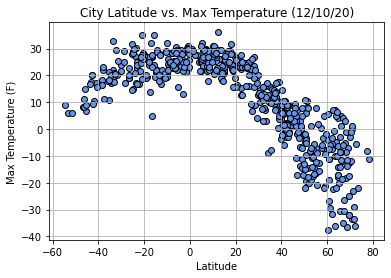

In [42]:
plt.scatter(city_lat, max_temp, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Max Temperature (12/10/20)")
plt.grid(b=None, which = 'major',axis = 'both')

## Latitude vs. Humidity Plot

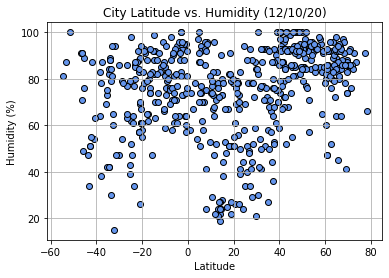

In [43]:
plt.scatter(city_lat, humidity, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Humidity (12/10/20)")
plt.grid(b=None, which = 'major',axis = 'both')

## Latitude vs. Cloudiness Plot

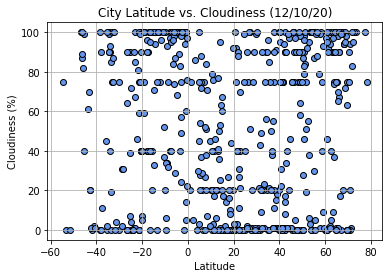

In [44]:
plt.scatter(city_lat, cloudiness, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Cloudiness (12/10/20)")
plt.grid(b=None, which = 'major',axis = 'both')

## Latitude vs. Wind Speed Plot

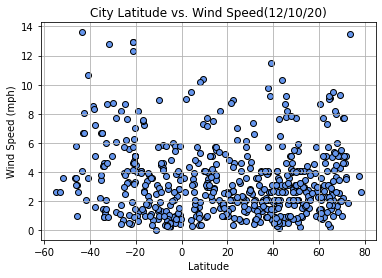

In [45]:
plt.scatter(city_lat, wind_speed, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Wind Speed(12/10/20)")
plt.grid(b=None, which = 'major',axis = 'both')

## Linear Regression

In [57]:
# Creating Northern and Southern Hemisphere Dataframes
N_hemisphere = city_df.loc[city_df['Lat']>=0]
S_hemisphere = city_df.loc[city_df['Lat']<0] 

In [58]:
import scipy.stats as st

In [62]:
N_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Boden,65.83,21.69,1.00,86,90,2.60,SE,1607665357
4,Bathsheba,13.22,-59.52,26.00,78,40,5.10,BB,1607665358
6,Hilo,19.73,-155.09,23.00,78,20,2.60,US,1607665358
7,Verāval,20.90,70.37,24.97,76,92,2.59,IN,1607665358
8,Longyearbyen,78.22,15.64,-11.00,66,75,2.60,SJ,1607665184
...,...,...,...,...,...,...,...,...,...
555,Liuzhou,24.31,109.39,16.03,58,99,2.31,CN,1607665438
556,Saint George,37.10,-113.58,7.00,36,1,2.10,US,1607665237
558,Taft,31.75,54.21,3.00,93,20,1.74,IR,1607665438
560,Bischheim,48.62,7.76,1.11,92,90,2.10,FR,1607665439


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8747193600905884


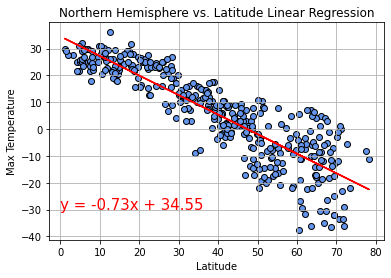

In [100]:
#Northern Hemisphere
correlation = st.pearsonr(N_hemisphere['Lat'], N_hemisphere['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(N_hemisphere['Lat'], N_hemisphere['Max Temp'])
regress_values = N_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(N_hemisphere['Lat'], N_hemisphere['Max Temp'], marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.plot(N_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere vs. Latitude Linear Regression")
plt.grid(b=None, which = 'major',axis = 'both')
print(f"The r-value is {round(correlation[0],17)}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.5781638391649357


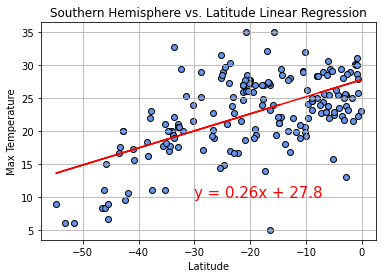

In [99]:
#Southern Hemisphere
correlation = st.pearsonr(S_hemisphere['Lat'], S_hemisphere['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(S_hemisphere['Lat'], S_hemisphere['Max Temp'])
regress_values = S_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(S_hemisphere['Lat'], S_hemisphere['Max Temp'], marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.plot(S_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere vs. Latitude Linear Regression")
plt.grid(b=None, which = 'major',axis = 'both')
print(f"The r-value is {round(correlation[0],17)}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.4280532148352957


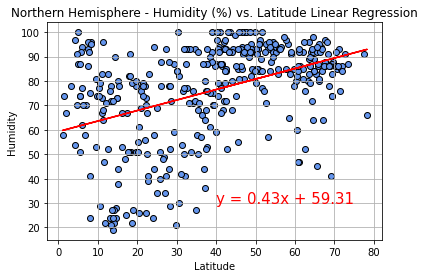

In [94]:
#Northern Hemisphere
correlation = st.pearsonr(N_hemisphere['Lat'], N_hemisphere['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(N_hemisphere['Lat'], N_hemisphere['Humidity'])
regress_values = N_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(N_hemisphere['Lat'], N_hemisphere['Humidity'], marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.plot(N_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.grid(b=None, which = 'major',axis = 'both')
print(f"The r-value is {round(correlation[0],17)}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.251555139443597


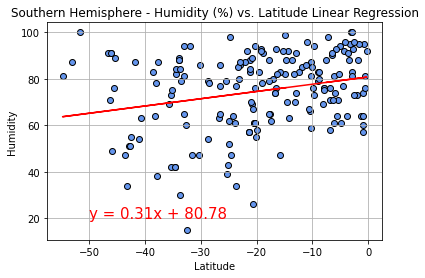

In [93]:
# Southern Hemisphere
correlation = st.pearsonr(S_hemisphere['Lat'], S_hemisphere['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(S_hemisphere['Lat'], S_hemisphere['Humidity'])
regress_values = S_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(S_hemisphere['Lat'], S_hemisphere['Humidity'], marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.plot(S_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.grid(b=None, which = 'major',axis = 'both')
print(f"The r-value is {round(correlation[0],17)}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.3057037231740847


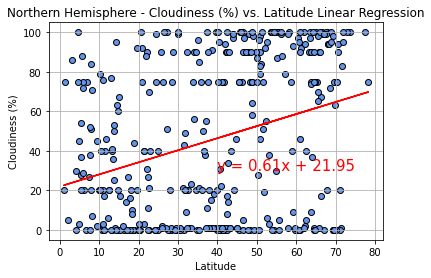

In [101]:
#Northern Hemisphere
correlation = st.pearsonr(N_hemisphere['Lat'], N_hemisphere['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(N_hemisphere['Lat'], N_hemisphere['Cloudiness'])
regress_values = N_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(N_hemisphere['Lat'], N_hemisphere['Cloudiness'], marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.plot(N_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.grid(b=None, which = 'major',axis = 'both')
print(f"The r-value is {round(correlation[0],17)}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2622309838377272


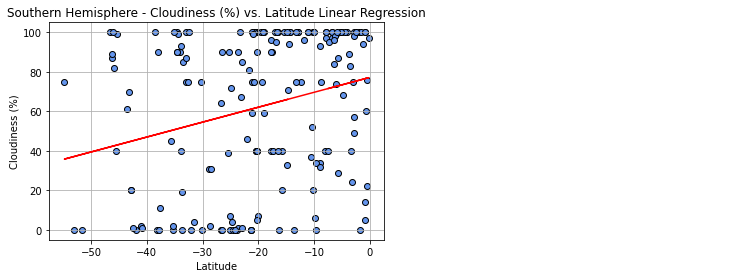

In [102]:
# Southern Hemisphere
correlation = st.pearsonr(S_hemisphere['Lat'], S_hemisphere['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(S_hemisphere['Lat'], S_hemisphere['Cloudiness'])
regress_values = S_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(S_hemisphere['Lat'], S_hemisphere['Cloudiness'], marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.plot(S_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.grid(b=None, which = 'major',axis = 'both')
print(f"The r-value is {round(correlation[0],17)}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression